<a href="https://colab.research.google.com/github/letsplaywithstrings/team_stars_analysis/blob/main/medical_cost_analysis_team_stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## TEAM STARS MEDICAL COST ANALYSIS

#**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

#**Load Dataset**

In [3]:
data = pd.read_csv("insurance.csv")

#**Exploratory Data Analysis**

**Examine the distribution of Bmi (Body Mass Index)**

<Axes: xlabel='bmi', ylabel='Count'>

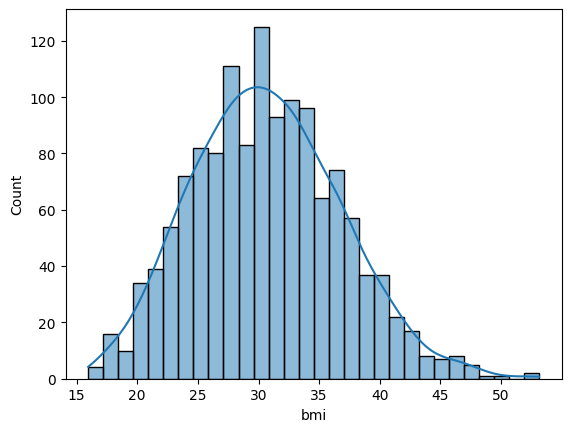

In [ ]:
sns.histplot(data['bmi'], bins=30, kde=True)

- It is like the normal distribution with right skewed.

**Examine the relationship between “smoker” and “charges”**

<Axes: xlabel='smoker', ylabel='charges'>

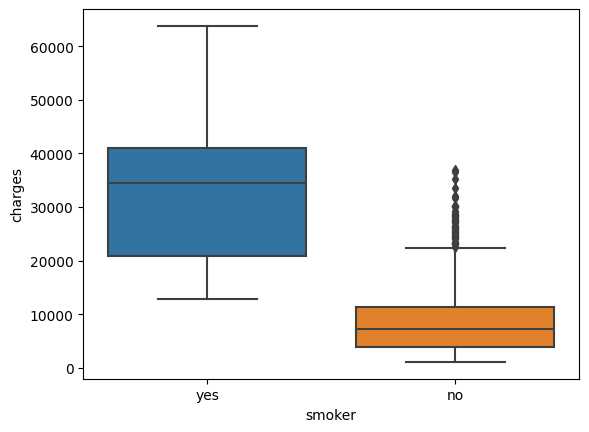

In [ ]:
sns.boxplot(x='smoker', y='charges', data=data)

- Smokers medical costs are more than non smokers.


**Examine the relationship between “smoker” and “region”**

<Axes: xlabel='region', ylabel='count'>

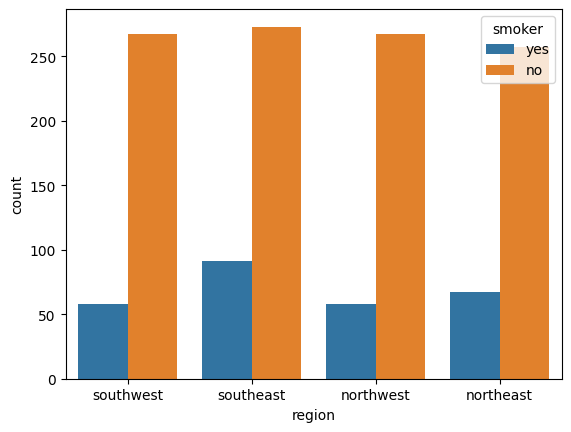

In [ ]:
sns.countplot(x='region', hue='smoker', data=data)

- Most smokers ratio and number of smoker persons is in southeast region.

**Examine the relationship between “bmi” and “sex”.**

<Axes: xlabel='sex', ylabel='bmi'>

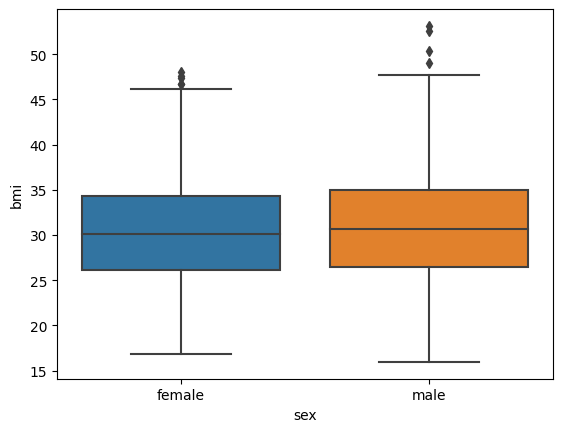

In [ ]:
sns.boxplot(x='sex', y='bmi', data=data)

- Regarding to graph sex and bmi are almost same as each other in terms of distribution.

**Find the "region" with the most "children".**

In [ ]:
region_children = data.groupby('region')['children'].mean()
most_children_region = region_children.idxmax()
print(f"The region with the most children is: {most_children_region}")

The region with the most children is: northwest


- The region with the most children is: northwest


**Examine the relationship between “age” and “bmi”.**

<Axes: xlabel='age', ylabel='bmi'>

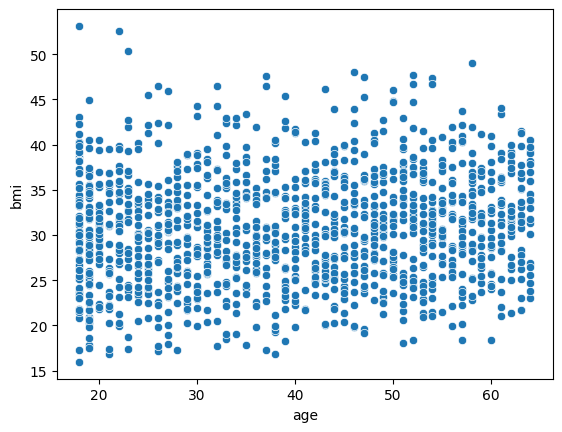

In [ ]:
sns.scatterplot(x='age', y='bmi', data=data)

- There is no relationship between age and bmi.

**Examine the relationship between “bmi” and “children”.**

<Axes: xlabel='children', ylabel='bmi'>

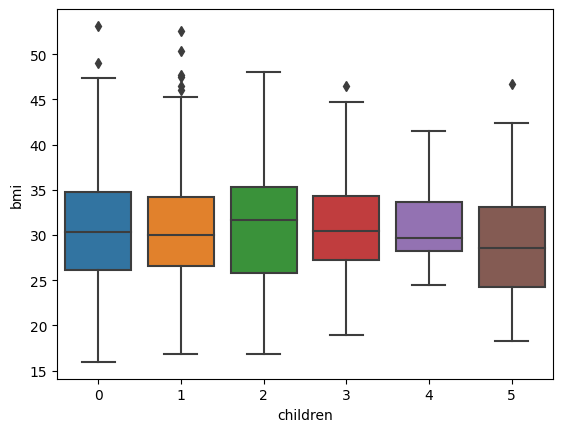

In [ ]:
sns.boxplot(x='children', y='bmi', data=data)

- The variance is reducing for [0,5] interval bmi whereas for 5 children it can be counted as an outlier.

**Is there an outlier in the "bmi" variable?**

There are some outliers in bmi variable.


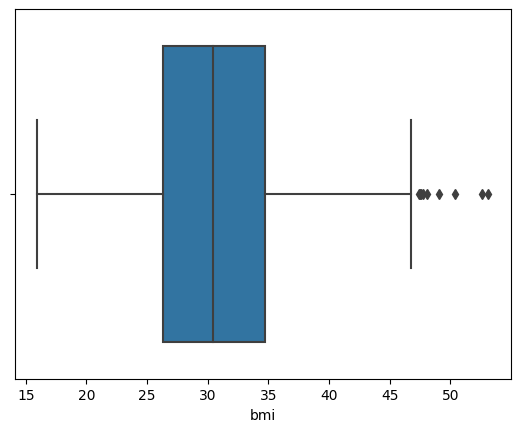

In [ ]:
sns.boxplot(x=data['bmi'])
print("There are some outliers in bmi variable.")

- There are some outliers in bmi variable.

**Examine the relationship between “bmi” and “charges”**

<Axes: xlabel='bmi', ylabel='charges'>

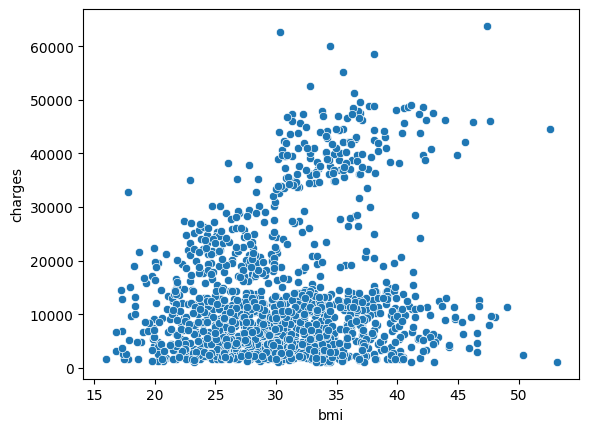

In [ ]:
sns.scatterplot(x='bmi', y='charges', data=data)

- There is no apparent relationship between bmi and charges.

**Examine the relationship between “region”, “smoker” and “bmi” using bar plot.**

Text(0.5, 1.0, 'Relationship between Region, Smoker, and BMI')

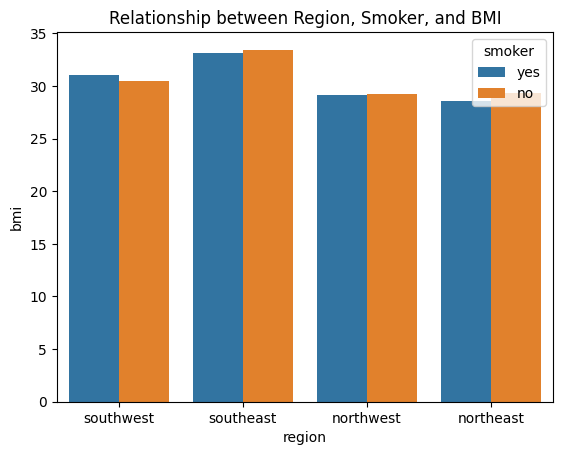

In [ ]:
sns.barplot(x='region', y='bmi', hue='smoker', data=data, errorbar=None)
plt.title("Relationship between Region, Smoker, and BMI")

- Bmi is independent from region and smoker variables.

#**Data Preprocessing**

In [ ]:
# Separate categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Apply one-hot encoding to categorical features
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(onehot_encoder.fit_transform(data[categorical_features]), columns=onehot_encoder.get_feature_names_out(categorical_features))

# Concatenate numerical features with encoded categorical features
data_encoded = pd.concat([data[numerical_features], categorical_encoded], axis=1)

# Split dataset into features (X) and target (y)
X = data_encoded
y = data['charges']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the dataset using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Model Selection**

In [ ]:
# Initialize the models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()
svr = SVR()

# List of models
models = [linear_reg, random_forest, svr]

# Perform cross-validation and calculate scores
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{model.__class__.__name__} - RMSE: {np.mean(rmse_scores):.2f}")

LinearRegression - RMSE: 6147.09
RandomForestRegressor - RMSE: 4967.58
SVR - RMSE: 12566.80


*We select Random Forest Regressor because it performed best performance based on RMSE among other models.*

#**Hyper-parameter Optimization**

In [ ]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


#**Model evaluation**

In [ ]:
# Predict on the test set using the optimized model
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 19077468.54067144
Mean Absolute Error: 2487.772699133369
R-squared: 0.8771167509237758


# **Interpretation**

**The model performs well with a relatively low MAE, high R2 score, and a competitive MSE. This suggests that the model's predictions are, on average, quite close to the actual charges, and the model explains a substantial portion of the variability in the charges. The model's performance is strong.**

# **Contributors**

- Büşra Nisa Özkaya (b.nisaozkaya@gmail.com)
- Ahmet Metin (ahmet.metin817@gmail.com)